In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

It is used to calculate or predict the probability of a binary (yes/no) event occurring.Classification is supervised machine learning technique used to predict the classes of a variable based on trained data

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

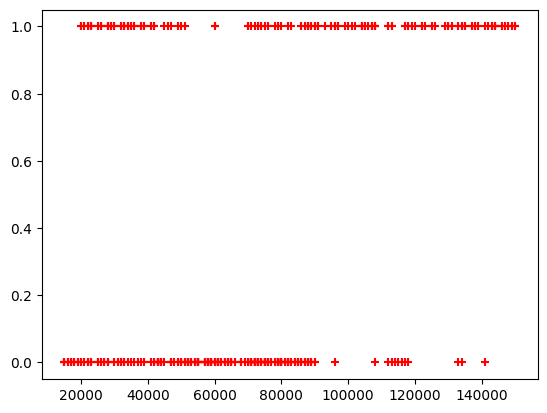

In [4]:
plt.scatter(df['EstimatedSalary'],df['Purchased'],marker='+',color='red')

In [5]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

The fit_transform() method of the StandardScaler class is used to standardize the training data (x_train). The fit_transform() method fits the scaler to the data and applies the standardization transformation simultaneously. It calculates the mean and standard deviation of each feature in the training data and transforms the data by subtracting the mean and dividing by the standard deviation. This process ensures that each feature has a mean of 0 and a standard deviation of 1.

https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

z = (x-u)/sigma

u = mean
sigma = standard deviation

In [9]:
y_pred=model.predict(x_test)

In [10]:
model.score(x_test,y_test)*100

80.0

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print(acc,pre,recall)
cm=confusion_matrix(y_test,y_pred)
print(cm)

0.8 0.64 0.6956521739130435
[[48  9]
 [ 7 16]]


The accuracy_score function is used to calculate the accuracy score. It compares the predicted labels (y_pred) with the true labels (y_test) and calculates the proportion of correctly classified instances.

The precision_score function is used to calculate the precision score. It measures the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions (both true positives and false positives).

The recall_score function is used to calculate the recall score, also known as sensitivity or true positive rate. It measures the proportion of true positive predictions (correctly predicted positive instances) out of all actual positive instances.

This function is used to calculate the confusion matrix, which is a table that summarizes the performance of a classification model. The confusion_matrix function takes y_test and y_train calculates the confusion matrix based on them.
The confusion matrix is a useful tool for evaluating the performance of a classification model. It provides a detailed breakdown of the model's predictions, showing the counts of true positive, true negative, false positive, and false negative predictions.

Confusion matrix is one of the easiest and most intuitive metrics used for finding the accuracy of a classification model, where the output can be of two or more categories. This is the most popular method used to evaluate logistic regression.

TP,FP,FN,TN=cm.ravel()
print(TP,FP,FN,TN)

The first row represents the true labels for the negative class (class 0). There are 48 instances that belong to the negative class, and the classifier predicted all of them correctly as the negative class (true negatives).

The second row represents the true labels for the positive class (class 1). There are 23 instances that belong to the positive class, but the classifier correctly predicted 16 of them as the positive class (true positives). However, there were 7 instances that actually belong to the positive class but were misclassified as the negative class (false negatives).

In summary, the confusion matrix indicates that the classifier achieved 48 true negatives, 16 true positives, 7 false negatives, and 9 false positives.

True Positive (TP): The number of instances that are correctly predicted as positive.
True Negative (TN): The number of instances that are correctly predicted as negative.
False Positive (FP): The number of instances that are incorrectly predicted as positive (a type I error).
False Negative (FN): The number of instances that are incorrectly predicted as negative (a type II error).

accuracy: (TP+TN)/(TP+TN+FP+FN)
precision: (TP)/(TP+FP)
recall: (TP)/(TP+FN)
f1 score: 2*(precision*recall)/precision+recall
https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a